![EU Banner](images/eu_banner.png)

# **3) Model Run**
---

This use case intends to introduce the basic mechanics of the hydrological model [LISFLOOD](https://github.com/ec-jrc/lisflood-code/).
<br>
In this exercise, the objective is to conduct a model run read and visualize multiple time series and maps to investigate the results. <br>

## **3) Main Run Settings**

Remember, that we had two different settings files in the **`/settings`** folder:
* **`Settings_PreRun.xml`**: the settings file prepared and used for the initialization run (last exercise)  
* **`Settings_Run.xml`**: the settings file prepared and used for the actual model or calibration run (this exercise)  

We managed the initialization already in which we created the steady state inflow rates to the lower zone, and now we will utilize this information to perform the actual model run.<br>
As introduced in the last exercise, the settings differ from the initialization run! 

---

The main settings of the main model run in our example look:

<small>

```xml
<lfoptions>
    # [...]
    
    # INITIALIZATION RUN
    <setoption choice="1" name="TransLoss"/>
    <setoption choice="1" name="MCTRouting"/>

    <setoption choice="0" name="InitLisflood"/>
    <setoption choice="1" name="ColdStart"/>

    #-----------------------------------------------------------
    # report time series
    #-----------------------------------------------------------
    # report discharge TS
    <setoption choice="1" name="repDischargeTs"/>
    <setoption choice="1" name="repEtactBudykoTs"/>

    # report gauges and sites
    <setoption choice="0" name="repStateSites"/>
    <setoption choice="0" name="repRateSites"/>
    <setoption choice="1" name="repStateUpsGauges"/>
    <setoption choice="1" name="repRateUpsGauges"/>
    <setoption choice="1" name="repMeteoUpsGauges"/>

    # report reservoirs and lakes
    <setoption choice="0" name="repsimulateLakes"/>
    <setoption choice="0" name="repsimulateReservoirs"/>

    # report et-related rates (do not show up via repRates)
    <setoption choice="1" name="repBal1"/>
    
    #-----------------------------------------------------------
    # report maps
    #-----------------------------------------------------------
    # report state maps
    <setoption choice="1" name="repStateMaps"/>

    # report end maps
    <setoption choice="0" name="repEndMaps"/>
    <setoption choice="0" name="repTopSoilMoistureMaps"/>
    <setoption choice="0" name="repSurfaceSoilMoistureMaps"/>
    <setoption choice="1" name="repDischargeMaps"/>
    <setoption choice="0" name="repSurfaceRunoffMaps"/>

    # report maps
    <setoption choice="0" name="repRainMaps"/>
    <setoption choice="1" name="repSnowMaps"/>
    <setoption choice="1" name="repSnowCoverMaps"/>
    <setoption choice="1" name="repSnowMeltMaps"/>

    <setoption choice="0" name="repThetaMaps"/>
    <setoption choice="0" name="repThetaForestMaps"/>
    <setoption choice="0" name="repThetaIrrigationMaps"/>
    <setoption choice="1" name="repLZMaps"/>
    <setoption choice="1" name="repUZMaps"/>
    <setoption choice="0" name="repGwPercUZLZMaps"/>
    <setoption choice="1" name="repE2O1"/>
    <setoption choice="0" name="repE2O2"/>
    <setoption choice="0" name="repRWS"/>

    # [...]

</lfoptions>

<lfuser>
    # [...]

    # GENERAL MODEL SETUP RUN
    <textvar name="PathRoot" value= "./../7859_testing">
    <textvar name="PathInit" value="$(PathRoot)/initial">
    <textvar name="CalendarDayStart" value="02/01/1975 00:00">
    <textvar name="StepStart" value="02/01/1975 00:00">
    <textvar name="StepEnd" value="01/01/2024 00:00">
    <textvar name="timestepInit" value="1"/>
    <textvar name="DtSec" value="86400"/>
    <textvar name="DtSecChannel" value="14400"/>
    <textvar name="Gauges" value="-72.675 -45.425">
    <textvar name="ReportSteps" value="365+365..endtime">
    <textvar name="NumDaysSpinUp" value="1095">

    # [...]

    # INITIAL CONDITIONS
    # water balance
    <textvar name="OFDirectInitValue" value="0">
    <textvar name="OFOtherInitValue" value="0">
    <textvar name="OFForestInitValue" value="0">
    <textvar name="SnowCoverAInitValue" value="0">
    <textvar name="SnowCoverBInitValue" value="0">
    <textvar name="SnowCoverCInitValue" value="0">
    <textvar name="FrostIndexInitValue" value="0">
    <textvar name="CumIntInitValue" value="0">
    <textvar name="UZInitValue" value="$(PathOut)/uz.end.nc">
    <textvar name="DSLRInitValue" value="1">

    # soil
    <textvar name="LZInitValue" value="-9999">
    <textvar name="ThetaInit1Value" value="$(PathOut)/th1.end.nc">
    <textvar name="ThetaInit2Value" value="$(PathOut)/th2.end.nc">
    <textvar name="ThetaInit3Value" value="$(PathOut)/th3.end.nc">

    # channel
    <textvar name="TotalCrossSectionAreaInitValue" value="-9999">
    <textvar name="CrossSection2AreaInitValue" value="-9999">
    <textvar name="PrevSideflowInitValue" value="-9999">
    <textvar name="PrevDischarge" value="-9999">
    <textvar name="PrevDischargeAvg" value="-9999">
    <textvar name="PrevCmMCTInitValue" value="-9999">
    <textvar name="PrevDmMCTInitValue" value="-9999">

    # lake (if simulateLakes = 1)
    <textvar name="LakeInitialLevelValue" value="-9999">
    <textvar name="LakePrevInflowValue" value="-9999">
    <textvar name="LakePrevOutflowValue" value="-9999">

    # forest
    <textvar name="CumIntForestInitValue" value="0">
    <textvar name="UZForestInitValue" value="$(PathOut)/uzf.end.nc">
    <textvar name="DSLRForestInitValue" value="1">
    <textvar name="ThetaForestInit1Value" value="$(PathOut)/thf1.end.nc">
    <textvar name="ThetaForestInit2Value" value="$(PathOut)/thf2.end.nc">
    <textvar name="ThetaForestInit3Value" value="$(PathOut)/thf3.end.nc">

    # irrigation
    <textvar name="CumIntIrrigationInitValue" value="0">
    <textvar name="UZIrrigationInitValue" value="0">
    <textvar name="DSLRIrrigationInitValue" value="1">
    <textvar name="ThetaIrrigationInit1Value" value="$(PathOut)/thi1.end.nc">
    <textvar name="ThetaIrrigationInit2Value" value="$(PathOut)/thi2.end.nc">
    <textvar name="ThetaIrrigationInit3Value" value="$(PathOut)/thi3.end.nc">

    # impervious (sealed) areas
    <textvar name="CumIntSealedInitValue" value="0">
    # [...]

    <textvar name="TransLossTS" value="$(PathOut)/TransLosslong_term_run.tss"></textvar>   
    <textvar name="TransLossQAvgTS" value="$(PathOut)/TransLossQAvglong_term_run.tss"></textvar>      

</lfuser>

<lfbinding>
    <textvar name="LZAvInflowMap" value="$(PathInit)/lzavin">
    <textvar name="SeepTopToSubBAverageOtherMap" value="$(PathOut)/SeepTopToSubBAverageOtherMap"> </textvar> 
    <textvar name="SeepTopToSubBAverageForestMap" value="$(PathOut)/SeepTopToSubBAverageForestMap"> </textvar>    
    <textvar name="SeepTopToSubBAverageIrrigationMap" value="$(PathOut)/SeepTopToSubBAverageIrrigationMap"> </textvar>             
</lfbinding>
```

Remember, in the pre-run (or initialization run) we should have produced 16 maps that are part of the settings here as well, as we need them to properly initialize the model states.<br>
In general, you probably notice some differences in the *Actual Run* settings compared to the *Initialization Run*, which we will briefly discuss:
* The **`InitLisflood`** setting was now set to 0 as we obviously do not want to initialize LISFLOOD again.
* The **`ColdStart`** setting was turned on (put 1).
* We picked two flags that we recommend to use (set to 1) with respect to the considered processes:
    * **`MCTRouting`** to use MCT routing
    * **`TransLoss`** to use transmission losses
* The **report time series** and **report maps** blocks are crucial now since we define here what outputs we want to print. Users should be aware that especially the map block can lead to a **huge** increase in run times and thus, it is recommended to only print whatever variables are needed.
    * We printed a couple of maps and time series. For time series the **`...UpsGauges`** settings are improtant if you want to have (sub-)basin time series for the locations you specify under **`...Gauges`**. This provides aggregated time series for the (sub-)basins rather than pixel-specific time series.
* For the general model setup block under **`<lfuser>`** is almost similar to the setup in the *Initialization Run*, however, we included one special condition for **`ReportSteps`**, which provides a lot of flexibility to manage the printing of the state variables (**`repStateMaps`** ).
    * The **`365+365..endtime`** value means that we are writing only the snapshoot of the state variables every 365 days, so roughly at the end of each year. However, users can write much more time steps, e.g. **`1..99999`** indicates that every time steps will be written to the state variables .nc files. More infos on that setting can be found [here](https://ec-jrc.github.io/lisflood-code/3_step3_preparing-setting-file/)  
* The **inital conditions block** contains some changes compared to the *Initialization Run*. For example for all theta (soil moisture) variables we set the **`.end.nc`** files that were produced during the initialzation for each layer. The same applies to the Upper Zone (UZ) initialization that also take the values stored in the files produced during initialization. 
* In the **bindings block**, do not forget to define the paths to the average percolation and seepage maps produced in the *Initialization Run*. Please note that these maps are quite important, for instance, in our setup the **`.end.nc`** maps refer to the last time step of the *Initialization Run*, which has the same simulation period is the *Actual Run* here! Of course it would not make sense to use this one as initial value of the *Actual Run* (due to a multi-year gap), however, this value is used for the calculation of the **`SeepTopToSubBAverage`** maps.
* Remember that the **`NumDaysSpinUp`** is only actively used in the *Initialization Run*! In the *Actual Run* it has no impact, however, in GloFAS we usually discard the Spin Up anyway from the analysis since in the *Actual Model Run*, we still have to initialise/fill the surface waters (streams, reservoirs, lakes) that might take some time, especially in the case of larger reservoirs and lakes.

More infos can be found [here](https://ec-jrc.github.io/lisflood-code/3_step6_running-LISFLOOD/).
As this is a crucial step and understanding the settings file is one of the keys for a succesfull LISFLOOD applicatons, we encourage users to take some time to play around here and do some testing.

If everything is set properly in your **`Settings_Run.xml`** file then we can start running the *Actual Model Run*.
As before, open the terminal, navigate to your settings folder, activate your conda environment (which you should have done already in the initialization) where you installed LISFLOOD and run the model.
This should look as follows:

```bash
conda activate <your_lisflood_environment>
cd <path_where_you_saved_the_repository>/settings/
lisflood Settings_Run.xml
```

When the run was successfull, you should have a couple of maps (.nc) and time series files (.tss) files in your **`$(PathOut)`** folder as described before.<br>
We will now check how the steady-state percolation values in this file look!

In [2]:
from pathlib import Path
from datetime import datetime
from scipy.spatial.distance import jensenshannon

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
# Universally applicable Lisflood TSS Read Function
def read_lisflood_tss(
    out_dir: Path,
    varname: str,
    start_date: str,
    n_gauges: int,
    skiprows: int,
    freq: str = "D"
) -> pd.DataFrame:
    """
    Robust reader for LISFLOOD .tss files with varname+runname convention.
    Handles small float values correctly.
    """
    run_name = out_dir.name
    tss_file = out_dir / f"{varname}{run_name}.tss"

    if not tss_file.exists():
        print(f"⚠️ Missing LISFLOOD file → filled with NaNs: {tss_file}")
        return pd.DataFrame(
            columns=[f"gauge_{i+1}" for i in range(n_gauges)]
        )

    # Read the file using whitespace delimiter for robustness
    df = pd.read_csv(
        tss_file,
        skiprows=skiprows,
        delim_whitespace=True,
        header=None,
        usecols=range(n_gauges + 1),  # only keep index + gauges
        dtype={i: float for i in range(1, n_gauges + 1)}  # gauge columns as float
    )

    # Only keep the first n_gauges + 1 columns (date/index + gauges)
    df = df.iloc[:, : n_gauges + 1]

    # Convert gauge columns to float safely
    for i in range(1, n_gauges + 1):
        df[i] = df[i].astype(float)

    # Set column names
    df.columns = ["date"] + [f"gauge_{i+1}" for i in range(n_gauges)]

    # Create date index
    df["date"] = pd.date_range(start=start_date, periods=len(df), freq=freq)
    return df.set_index("date")

def linregress_np(x, y):
    """
    Simple linear regression using numpy (equivalent to scipy.stats.linregress).
    
    Parameters:
    -----------
    x : array-like
        Independent variable
    y : array-like
        Dependent variable
    
    Returns:
    --------
    slope : float
        Slope of the regression line
    intercept : float
        Intercept of the regression line
    r : float
        Correlation coefficient (R)
    """
    # Remove any NaN values
    mask = ~(np.isnan(x) | np.isnan(y))
    x_clean = np.asarray(x)[mask]
    y_clean = np.asarray(y)[mask]
    
    # Calculate means
    x_mean = np.mean(x_clean)
    y_mean = np.mean(y_clean)
    
    # Calculate slope and intercept
    numerator = np.sum((x_clean - x_mean) * (y_clean - y_mean))
    denominator = np.sum((x_clean - x_mean) ** 2)
    
    slope = numerator / denominator
    intercept = y_mean - slope * x_mean
    
    # Calculate correlation coefficient (R)
    x_std = np.std(x_clean, ddof=1)
    y_std = np.std(y_clean, ddof=1)
    r = numerator / (len(x_clean) - 1) / (x_std * y_std)
    
    return slope, intercept, r



---

## 3a) Time Series (*.tss*)

For the time series we first load some libraries, create a function that easily reads all desired time series of the variables of interest and can be adapted accordingly.<br>
We create a dict in which we can map the files that we would like to read to whatever variable names we want.<br>
Users of course do not need to follow this approach, which is just an internal approach to handle files and variables in a structured way.


In [41]:
# Read the Upstream Area to get Basin Size
path_model = Path('..')
uparea_file = "upArea_unclipped.nc"
outlet_file = "outlet.txt"
uparea = xr.open_dataset(path_model / "maps" / uparea_file)
outlet = pd.read_csv(path_model / "station" / outlet_file,delimiter="\t", names=["lon", "lat", "id"])

basin_area = uparea.sel(lon=outlet.lon.item(), lat=outlet.lat.item(), method="nearest") # basin size in m2
basin_area = basin_area.Band1.item()

In [42]:
# Start Date
start_date = "01/02/1975 00:00" # in MM/DD/YYYY

# Read Data
outfold = Path.cwd() / "../out/long_term_run/"
run_name = "long_term_run"
dis_file = outfold / f"dis{run_name}.tss"

with open(dis_file) as f:
    lines = f.readlines()

# Extract number of gauges
n_gauges = int(lines[1].strip()) - 1
skiprows = 3 + n_gauges

# Obs Q
# obs_dis = pd.read_csv(OBS_DIR / 'observations.csv',parse_dates=[0])
# obs_dis.columns = ["Date","Discharge"]
# obs_dis = obs_dis.set_index("Date") #.drop(columns="date")

# Read Sim (all Vars)
# ETA = ESActPixel+self.var.TaPixel+self.var.TaInterceptionAll+self.var.EvaAddM3*self.var.M3toMM
vars_to_read = {
    "q": "dis",
    "et0": "etUps",
    "ew0": "ewUps", # open water ref ET
    "ewact":"evaopen", # open water ref ET2? -> probably actual
    "eta": "actEvapo",
    "et_budy": "actETPBUDYKOUps",
    "es": "esActUps",
    "transp": "tActUps",
    "intcpt": "ewIntActUps",
    "precip":"precipUps",
    "rain": "rainUps",
    "swe": "scovUps",
    "sf": "snowUps",
    "smlt": "snowMeltUps",
    "total_runoff": "totalRunoffUps",
    "perc": "percUZLZUps",
    "infil": "infUps",
    "qb_up": "qUzUps",
    "qb_low": "qLzUps",
    "gwloss": "gwLossUps",
    "lz": "lzUps",
    "uz": "uzUps",
    "theta": "theta1total",
    "theta2": "theta2total",
    "theta3": "theta3total"
}

lf_tss = {}

# Actual Read of files
for key, var in vars_to_read.items():
    lf_tss[key] = read_lisflood_tss(
        outfold, var, start_date, n_gauges, skiprows
    )

# Print the Variables
lf_tss.keys()

dict_keys(['q', 'et0', 'ew0', 'ewact', 'eta', 'et_budy', 'es', 'transp', 'intcpt', 'precip', 'rain', 'swe', 'sf', 'smlt', 'total_runoff', 'perc', 'infil', 'qb_up', 'qb_low', 'gwloss', 'lz', 'uz', 'theta', 'theta2', 'theta3'])

As in our example the last day of the simulation is 1st of January 2024, which is a very incomplete year without a big benefit, we eliminate the last time step to have the last complete year (2023) as last data.

In [43]:
# Get last year
last_year = lf_tss['q'].index.year.max()

# Drop the last year for all variables
for key in lf_tss.keys():
    lf_tss[key] = lf_tss[key][lf_tss[key].index.year != last_year]

print(f"Removed last year ({last_year}) from all variables.")

Removed last year (2024) from all variables.



---
### **Discharge**
As most hydrologists immediately wanna see how the discharge simulations of a specific run look and perform, we will start with a brief investigation of the discharge simulation results. <br>
For that, of course we have to load the actual discharge simulations to make a proper comparison!<br>
On top of that, we will calculate monthly, annual and seasonal flows for the available observations. <br>

Note: For this exercise, we will just ignore missing (NaN) values and continue. 

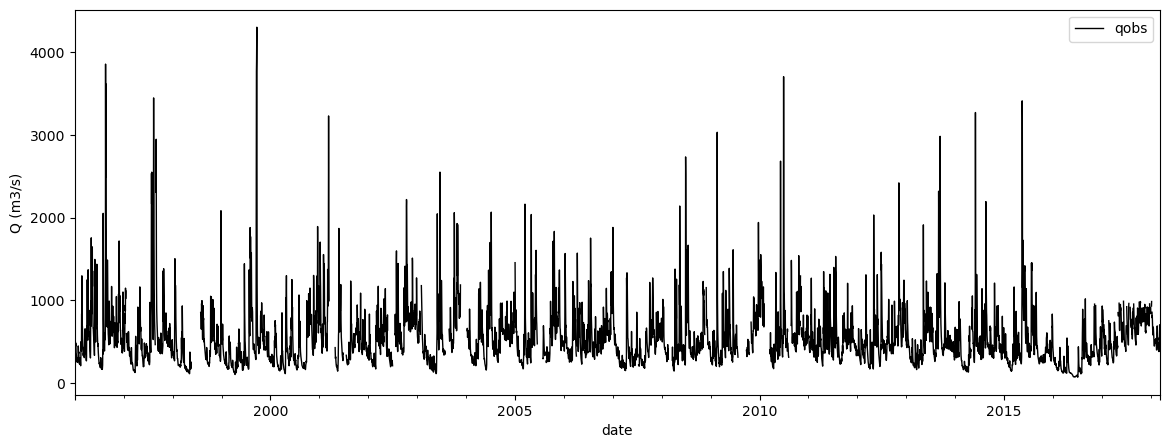

In [44]:
file_obs = path_model / "station"/ "observations.csv" 
qobs = pd.read_csv(file_obs,skiprows=1, names=["date", "qobs"], parse_dates=["date"],dayfirst=True)
qobs = qobs.set_index("date")
# get rid of the timestamp
qobs.index = qobs.index.normalize()
# st = "2000-01-01"
# end = "2016-12-31"
# qobs = qobs.loc[st:end]

# Check if the data is read properly and how it looks
fig, ax = plt.subplots(figsize=(14,5))
qobs.plot(ax=ax,lw=1,c="k")
ax.set_ylabel("Q (m3/s)")
# ax.set_xlim(qobs.index[0],qobs.index[365*3])
# ax.set_xlim("2012-01-01","2018-01-01")

# create monthly, annual, seasonal and mean day of the year time series
# --- Monthly time series ---
qobs_copy = qobs.copy()
qobs_copy = qobs_copy.iloc[1:] # Obs start at 31st of December 1995, so we eliminate this value to not deteriorate the monthly and annual statistics
qobs_mon = qobs_copy.resample('M').mean()  # monthly mean

# --- Annual time series ---
qobs_a = qobs_copy.resample('A').mean()   # annual mean

# --- Seasonal (mean per month across all years) ---
qobs_s = qobs_copy.groupby(qobs_copy.index.month).mean()
qobs_s.index = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

# --- Mean day-of-year (average for each day-of-year across all years) ---
qobs_doy = qobs.groupby(qobs.index.dayofyear).mean()

# Optional: if you want to set day-of-year as datetime for plotting
# qobs_doy.index = pd.to_datetime(qobs_doy.index, format='%j')

Now let us calculate the KGE & NSE for all dates with available data of the observed flows and the LISFLOOD simulations.<br>
First, we will create 3 functions for calculating NSE, KGE and an extended KGE that uses the Jensen-Shannon Difference as an additional compnent in the KGE calculation.<br>
The latter metric, called the JSD-KGE or just JDKGE, is presented here as it is used as official optimization metric in EFASv6 & GloFASv5 and intends to improve the balance of high and low flows.<br>
More information can be found in the following preprint: https://egusphere.copernicus.org/preprints/2026/egusphere-2026-43/

In [45]:
from scipy.stats import iqr

def fun_nse(obs, sim):
    # Align on overlapping dates
    obs_aligned, sim_aligned = obs.align(sim, join='inner', axis=0)
    
    # Drop any NaNs
    mask = obs_aligned.notna() & sim_aligned.notna()
    obs_aligned = obs_aligned[mask]
    sim_aligned = sim_aligned[mask]
    
    return 1 - np.sum((sim_aligned - obs_aligned)**2) / np.sum((obs_aligned - np.mean(obs_aligned))**2)

def fun_kge(obs, sim):
    # Align on overlapping dates
    obs_aligned, sim_aligned = obs.align(sim, join='inner', axis=0)
    
    # Drop any NaNs
    mask = obs_aligned.notna() & sim_aligned.notna()
    obs_aligned = obs_aligned[mask]
    sim_aligned = sim_aligned[mask]
    
    r = np.corrcoef(obs_aligned, sim_aligned)[0,1]
    alpha = np.std(sim_aligned)/np.std(obs_aligned)
    beta = np.mean(sim_aligned)/np.mean(obs_aligned)
    
    return 1 - np.sqrt((r-1)**2 + (alpha-1)**2 + (beta-1)**2)

## JSD - new improved JSD - discretized version with revised (scale-invariant) binning strategy
# ts_s=86400 for daily time step
def jsd_fd_log(obs, sim, ts_s):
    """
    Discretized Jensen-Shannon Divergence 
    input:
        obs: observed
        sim: simulated
        ts_s: data time step in seconds
    output:
        js_div: Jensen-Shannon Divergence in bits (using log2 in the JSD equation)
    """

# Jensen-Shannon Divergence - log2 with bins by quantiles of concantenated data

# The Jensen-Shannon-Divergence measures the distance between two data distributions
# The JS-div falls between 1 and 0 given that one uses the base 2 logarithm (output in bits), 
# with 0 meaning that the distributions are equal.

    # Fixed hyperparameters
    epsilon = 1e-6
    min_nbins = 25
    max_nbins = 100

    # time-step scaling factor
    ts_factor = ts_s / 86400

    ## non-finite and non-positive data filtering
    obs = obs[np.isfinite(obs) & (obs >= 0)]
    sim = sim[np.isfinite(sim) & (sim >= 0)]

    # epsilon adjustments for safety and data distribution consistency
    if len(obs[obs > 0]) > 0:
        obs_min_nonzero = np.min(obs[obs > 0])
    else:
        obs_min_nonzero = epsilon
    if len(sim[sim > 0]) > 0:
        sim_min_nonzero = np.min(sim[sim > 0])
    else:
        sim_min_nonzero = epsilon
    epsilon_max = min(obs_min_nonzero, sim_min_nonzero)

    if epsilon > epsilon_max:
        epsilon = epsilon_max * 1e-1

    obs[obs == 0] = epsilon
    sim[sim == 0] = epsilon

    # log transformation
    obs_log = np.log(obs)
    sim_log = np.log(sim)

    # Ensure bins are computed over the entire range of data (obs & sim)
    all_data = np.concatenate([obs_log, sim_log])
    obs_log_min = np.min(all_data)
    obs_log_max = np.max(all_data)

    # Freedman–Diaconis (FD) binning rule
    iqr_val = iqr(obs_log, nan_policy='omit')

    if iqr_val == 0:
        bin_width = (obs_log_max - obs_log_min) / min_nbins # fallback bin width
    else:
        bin_width = 2 * iqr_val / len(obs_log)**(1/3)  # FD-based bin width

    # Get number of bins (FD + safety limits)
    absolute_min_width = epsilon * 100    
    bin_width = max(bin_width, absolute_min_width)
    range_width = obs_log_max - obs_log_min
    n_bins = max(min(int(np.ceil((ts_factor**(1/3)) * range_width / bin_width)), max_nbins), min_nbins)

    # Generate bin edges 
    bin_edges = np.linspace(obs_log_min, obs_log_max, n_bins + 1)  
    bin_edges = bin_edges[np.isfinite(bin_edges)]                  

    bin_edges[0] = min(bin_edges[0], obs_log_min)
    bin_edges[-1] = max(bin_edges[-1], obs_log_max)

    # Compute the histogram for observed and simulated data with density normalization
    p_hist, _ = np.histogram(obs_log, bins=bin_edges, density=True)
    q_hist, _ = np.histogram(sim_log, bins=bin_edges, density=True)

    # Avoid zero probabilities by adding a small epsilon
    p_hist = p_hist + epsilon
    q_hist = q_hist + epsilon

    # Normalize histograms to ensure they represent probability distributions
    p_hist /= np.nansum(p_hist)
    q_hist /= np.nansum(q_hist)
    
    # Compute the mixture distribution
    mix_hist = 0.5 * (p_hist + q_hist)
    
    # Calculate JS divergence using base-2 logarithm
    js_div = 0.5 * np.nansum(p_hist * np.log2(p_hist / mix_hist)) + 0.5 * np.nansum(q_hist * np.log2(q_hist / mix_hist))

    return js_div

def KGE_JSD(o,s,dt):
    """
	Modified Kling Gupta Efficiency with additional Jensen-Shannon Divergence component 
	input:
        s: simulated
        o: observed
        dt: observations time step (in hours)
    output:
        KGE: Kling Gupta Efficiency
    """
    s, o = s.align(o, join='inner',axis=0)

    # Convert to NumPy
    s = s.values
    o = o.values

    s,o = filter_nan(s,o)
    B = np.mean(s) / np.mean(o)
    y = (np.std(s) / np.mean(s)) / (np.std(o) / np.mean(o))
    r = np.corrcoef(o, s)[0,1]
    ts_s = dt*3600
    JSD = jsd_fd_log(o, s, ts_s)   ## Jensen-Shannon Divergence
    
    KGE_JSD = 1 - np.sqrt( (r - 1) ** 2 + (B - 1) ** 2 + (y - 1) ** 2 + JSD**2 )

    return KGE_JSD

def filter_nan(s,o):
    """
    this functions removed the data  from simulated and observed data
    whereever the observed data contains nan
    
    this is used by all other functions, otherwise they will produce nan as 
    output
    """
    assert len(s) == len(o)
    data = np.array([s.flatten(),o.flatten()])
    data = np.transpose(data)
    data = data[~np.isnan(data).any(1)]
    assert len(s) == len(o)
    #assert len(o) > 1

    #mask = ~np.isnan(s) & ~np.isnan(o)
    #o_nonan = o[mask]
    #s_nonan = s[mask]

    #return o_nonan,s_nonan
    return data[:,0],data[:,1]

In [46]:
# Extract simulated discharge
qsim = lf_tss["q"]

# Create a series of qobs and qsim
qobs_series = qobs.iloc[:,0]  # assuming qobs has one column
qsim_series = qsim.iloc[:,0]  # assuming qsim has one column

# Get split date (when calib period starts)
split_date = "1996-08-25" # this is the date when the official GloFAS calibration period starts, so we want to evaluate only on the data after this date

# Subset
qobs_20 = qobs_series.loc[split_date:]
qsim_20 = qsim_series.loc[split_date:]

# Compute metrics
nse_20 = fun_nse(qobs_20, qsim_20)
kge_20 = fun_kge(qobs_20, qsim_20)
kge_ext_20 = KGE_JSD(qobs_20, qsim_20, dt=24)
print(f"NSE: {nse_20:.3f} \nKGE: {kge_20:.3f} \nKGE_ext: {kge_ext_20:.3f}")

NSE: 0.761 
KGE: 0.881 
KGE_ext: 0.880


In [47]:
# Calculate the metric
nse = fun_nse(qobs_series,qsim_series)
kge = fun_kge(qobs_series,qsim_series)
kge_ext = KGE_JSD(qobs_series, qsim_series, dt=24)

print(f"NSE: {nse:.3f} \nKGE: {kge:.3f} \nKGE_ext: {kge_ext:.3f}")

NSE: 0.764 
KGE: 0.881 
KGE_ext: 0.880


Okay now we have an idea of the results in terms of KGE and NSE. <br>
Let us have a look how the time series fit together visually.

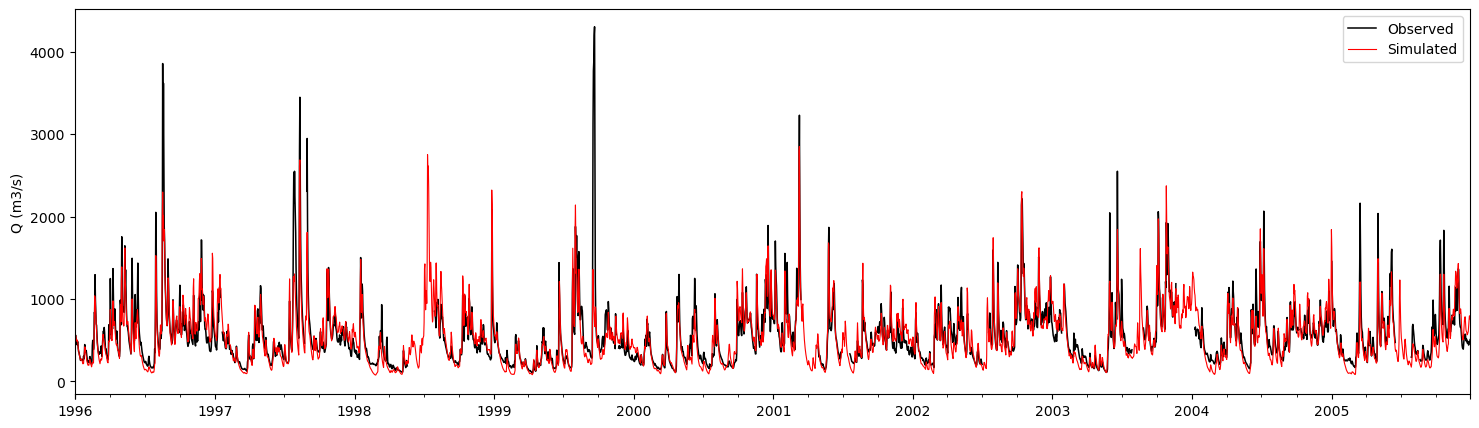

In [48]:
fig, ax = plt.subplots(figsize=(18,5))
qobs.plot(ax=ax,lw=1.1,c="k")
qsim.plot(ax=ax,lw=0.8,c="r")
ax.set_ylabel("Q (m3/s)")
# ax.set_xlim(qobs.index[0],qobs.index[-1])
ax.set_xlim(qobs.index[0],qobs.index[365*10])
ax.set_xlabel("")
ax.legend(["Observed","Simulated"]);

For a quick diagnostic check, we also calculate the monthly, seasonal, annual and day of the year time series of the simulated discharge.<br>
Afterwards we will plot the day of the year and annual time series of the simulation against the observation.<br>
Especially forthe day of the year time series we need to be careful to use the overlapping time period for comparability reasons. 

In [49]:
# create monthly, annual, seasonal and mean day of the year time series of the simulation
# --- Monthly time series ---
qsim_mon = qsim.resample('M').mean()  # monthly mean

# --- Annual time series ---
qsim_a = qsim.resample('A').mean()   # annual mean

# --- Seasonal (mean per month across all years) ---
qsim_s = qsim.groupby(qsim.index.month).mean()
qsim_s.index = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

# --- Mean day-of-year (average for each day-of-year across the overlapping observation years) ---
qsim_aligned, _ = qsim.iloc[:,0].align(qobs.iloc[:,0], join='inner')
qsim_doy = qsim_aligned.groupby(qsim_aligned.index.dayofyear).mean()

# Optional: if you want to set day-of-year as datetime for plotting
# qsim_doy.index = pd.to_datetime(qsim_doy.index, format='%j')

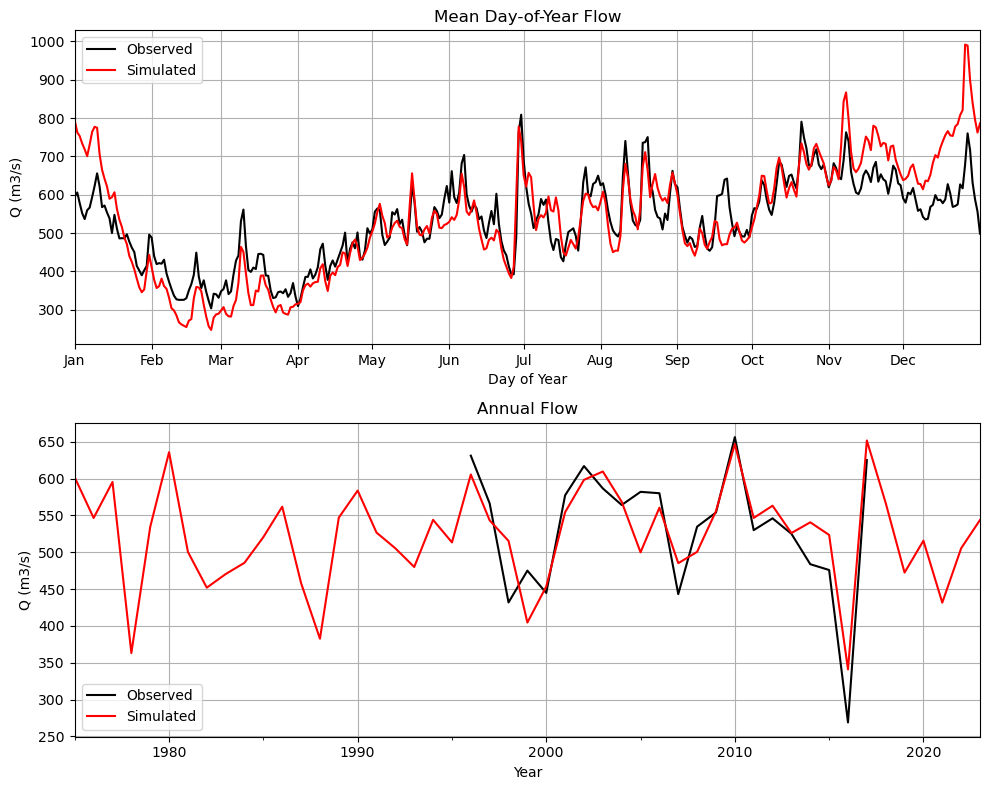

In [50]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=False)

# --- Subplot 1: Day-of-Year / Seasonal ---
qobs_doy.plot(ax=axes[0], color='black')
qsim_doy.plot(ax=axes[0], color='red')
axes[0].set_title('Mean Day-of-Year Flow')
axes[0].set_xlabel('Day of Year')
axes[0].set_ylabel('Q (m3/s)')
axes[0].legend()
axes[0].set_xlim(1,366)
axes[0].grid(True)
axes[0].legend(["Observed","Simulated"]);
# Use a non-leap reference year to get month starts
ref_year = 2001
months = pd.date_range(start=f"{ref_year}-01-01", end=f"{ref_year}-12-01", freq='MS')
# Convert month starts to DOY
month_positions = months.dayofyear
month_labels = months.strftime('%b')
axes[0].set_xticks(month_positions)
axes[0].set_xticklabels(month_labels)

# --- Subplot 2: Annual ---
qobs_a.iloc[:-1].plot(ax=axes[1], color='black')
qsim_a.plot(ax=axes[1], color='red')
axes[1].set_title('Annual Flow')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Q (m3/s)')
axes[1].legend()
axes[1].grid(True)
# axes[1].set_xlim(qobs_a.index[0],qobs_a.index[-1])
axes[1].legend(["Observed","Simulated"]);

# Adjust layout for better spacing
plt.tight_layout()

Let us check how flashy the hydrograph is in general (using the Richards-Baker Flashiness Index) and what the Coefficient of Variation (CV) tells us about interannual variability.

In [51]:
# Calculate Coefficient of Variation (CV) for both observed and simulated annual flows
cv_sim = qsim_a.std() / qsim_a.mean()
cv_obs = qobs_a.std() / qobs_a.mean()

print(f"Coefficient of Variation (CV) - Simulated Annual Flows: {cv_sim.item():.3f}")
print(f"Coefficient of Variation (CV) - Observed Annual Flows: {cv_obs.item():.3f}")

# Calculate the hydrograph flashiness using the Richards-Baker Flashiness Index (RBFI)
# RBFI = (sum of absolute day-to-day changes in flow) / (total
RBFI_obs = qobs_series.diff().abs().sum() / qobs_series.sum()
RBFI_sim = qsim_series.diff().abs().sum() / qsim_series.sum()
print(f"Richards-Baker Flashiness Index (RBFI) - Observed: {RBFI_obs:.3f}")
print(f"Richards-Baker Flashiness Index (RBFI) - Simulated: {RBFI_sim:.3f}")


Coefficient of Variation (CV) - Simulated Annual Flows: 0.130
Coefficient of Variation (CV) - Observed Annual Flows: 0.159
Richards-Baker Flashiness Index (RBFI) - Observed: 0.158
Richards-Baker Flashiness Index (RBFI) - Simulated: 0.144



---
### **Snow Processes**
As we know already that the catchment is located in the Patagonian Andes, we can assume that the hydrology will be snow-dominated to some degree.<br>
Let us therefore have a look whether the LISFLOOD results confirm this assumption or not.<br>
We will extract snow water equivalent (SWE) and snowmelt from the LISFLOOD run, resample it to multiple temporal scales and have a detailled look.  

In [52]:
# Extract Snow Melt and Snow Water Equivalent from the LISFLOOD time series
smlt = lf_tss["smlt"]
swe = lf_tss["swe"]

# Resample to monthly means, annual means, seasonal means and mean day of year
# --- Monthly time series ---
smlt_mon = smlt.resample('M').sum()  # monthly mean
swe_mon = swe.resample('M').mean()  # monthly mean

# --- Seasonal time series ---
smlt_s = smlt.groupby(smlt.index.month).mean()
swe_s = swe.groupby(swe.index.month).mean()
smlt_s.index = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
swe_s.index = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

# --- Annual time series ---
smlt_a = smlt.resample('A').sum()  # annual mean
smlt_a = smlt_a[:-1]  # drop last year if incomplete
swe_a = swe.resample('A').mean()  # annual mean
swe_a = swe_a[:-1]  # drop last year if incomplete

# --- Annual Max time series ---
swe_mx_a = swe.resample('A').max()  # annual mean
swe_mx_a = swe_mx_a[:-1]  # drop last year if incomplete

# --- Day of the year time series ---
smlt_doy = smlt.groupby(smlt.index.dayofyear).mean()
swe_doy = swe.groupby(swe.index.dayofyear).mean()


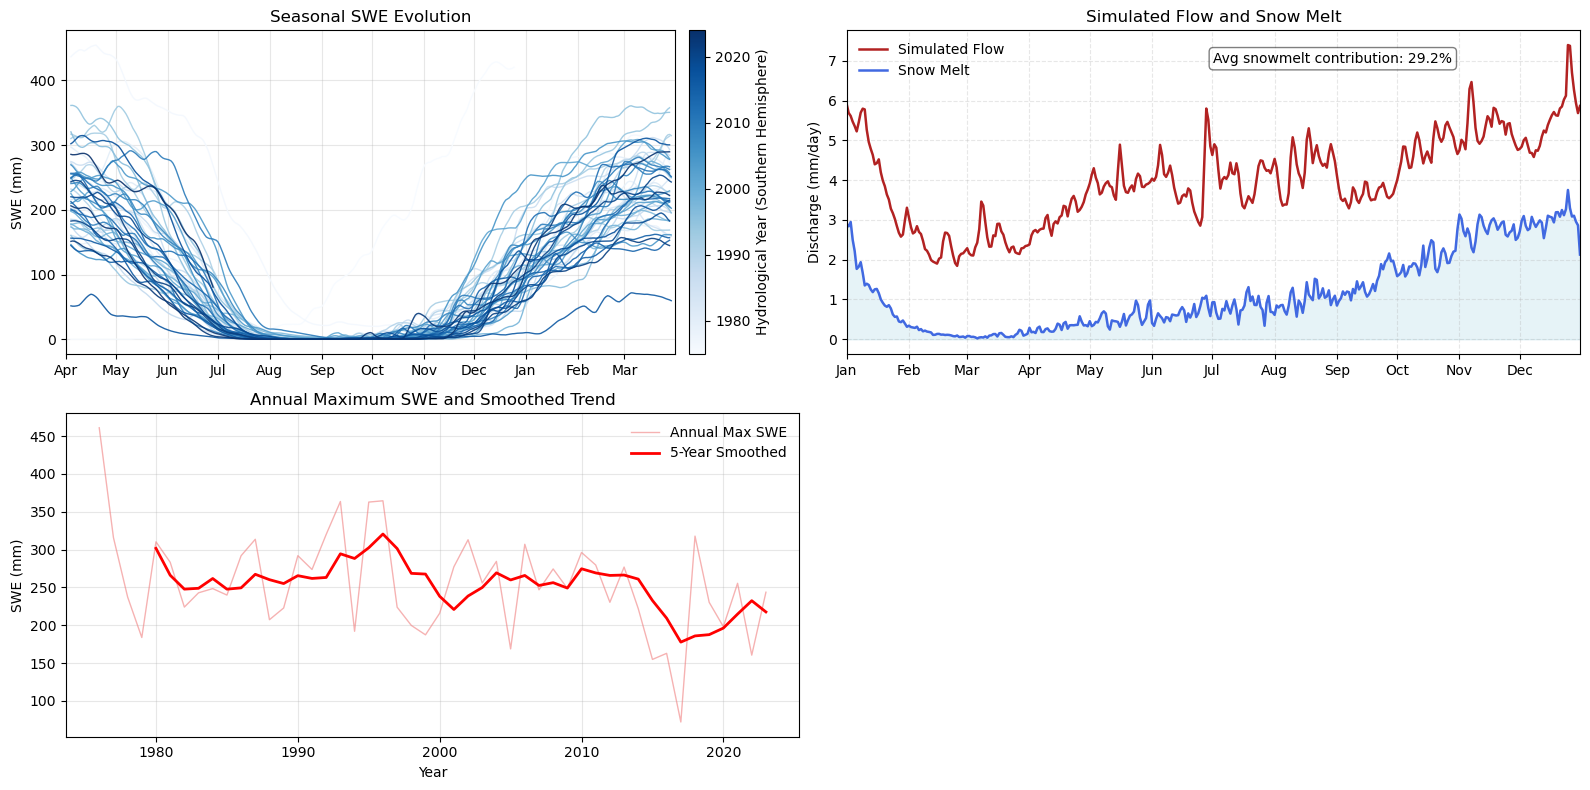

In [53]:
# Precalculations for the plot
# Ensure smlt_doy is a Series if it's a DataFrame
import matplotlib as mpl

if isinstance(smlt_doy, pd.DataFrame):
    smlt_series = smlt_doy.iloc[:,0]
else:
    smlt_series = smlt_doy

# Qsim in mm
qsim_doy_mm = qsim_doy / basin_area * 1e3 * 24*3600  # mm/day

total_flow = qsim_doy_mm.sum()
total_smlt = smlt_series.sum()
avg_share = 100 * total_smlt / total_flow

# Prepare SWE for hydrological year
swe_plot = swe.copy()

swe_plot["hydro_year"] = swe_plot.index.year + (swe_plot.index.month >= 10)

# Sort to be safe
swe_plot = swe_plot.sort_index()

# Compute hydrological DOY by cumulative count within each hydro year
swe_plot["doy_hydro"] = (
    swe_plot.groupby("hydro_year")
            .cumcount() + 1
)

# Figure 
fig, axes = plt.subplots(2, 2, figsize=(16, 8), sharex=False)
axes = axes.flatten()

# 1) Seasonal SWE Evolution (yearly curves)
years = np.sort(swe_plot["hydro_year"].unique())
cmap = plt.get_cmap("Blues")
norm = mpl.colors.Normalize(vmin=years.min(), vmax=years.max())

for year in years:
    yearly = swe_plot[swe_plot["hydro_year"] == year]
    axes[0].plot(
        yearly["doy_hydro"],
        yearly.iloc[:,0].rolling(7, center=True).mean(),
        color=cmap(norm(year)),
        alpha=0.9,
        linewidth=1
    )

axes[0].set_ylabel("SWE (mm)")
axes[0].set_title("Seasonal SWE Evolution")
axes[0].grid(alpha=0.3)

# Monthly ticks (hydrological year Apr-Mar)
ref_year = 2001
months = pd.date_range(start=f"{ref_year}-04-01", end=f"{ref_year+1}-03-01", freq="MS")
month_positions = (months - months[0]).days + 1
month_labels = months.strftime("%b")
axes[0].set_xticks(month_positions)
axes[0].set_xticklabels(month_labels)
axes[0].set_xlim(1, 365)

sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=axes[0], pad=0.02)
cbar.set_label("Hydrological Year (Southern Hemisphere)")

# 2) Simulated Flow + Snowmelt
axes[1].plot(qsim_doy_mm.index, qsim_doy_mm.values, color='firebrick', lw=1.8, label="Simulated Flow")
axes[1].plot(smlt_series.index, smlt_series.values, color='royalblue', lw=1.8, label="Snow Melt")

# Fill area to visualize snowmelt contribution
axes[1].fill_between(
    qsim_doy_mm.index,
    0,
    np.minimum(qsim_doy_mm.values, smlt_series.values),
    color='lightblue',
    alpha=0.3
)

# Monthly ticks (leap year for 366 DOY)
ref_year = 2000
months = pd.date_range(start=f"{ref_year}-01-01", end=f"{ref_year}-12-01", freq='MS')
month_positions = months.dayofyear
month_labels = months.strftime("%b")
axes[1].set_xticks(month_positions)
axes[1].set_xticklabels(month_labels)
axes[1].set_xlim(1, 366)

axes[1].grid(alpha=0.3, linestyle='--')
axes[1].set_ylabel("Discharge (mm/day)")
axes[1].set_title("Simulated Flow and Snow Melt")
axes[1].legend(frameon=False, fontsize=10)

# Optional: print average snowmelt contribution
axes[1].annotate(
    f"Avg snowmelt contribution: {avg_share:.1f}%",
    xy=(0.5, 0.9),
    xycoords='axes fraction',
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.5)
)

# 3) Annual Maximum SWE
axes[2].plot(swe_mx_a.index, swe_mx_a.values, lw=1, c="lightcoral", alpha=0.6, label="Annual Max SWE")
axes[2].plot(swe_mx_a.rolling(window=5).mean().index, swe_mx_a.rolling(window=5).mean().values,
             lw=2, c="red", label="5-Year Smoothed")

axes[2].set_ylabel("SWE (mm)")
axes[2].set_xlabel("Year")
axes[2].grid(alpha=0.3)
axes[2].legend(frameon=False, fontsize=10)
axes[2].set_title("Annual Maximum SWE and Smoothed Trend")

axes[3].axis('off')  # Hide the empty subplot
plt.tight_layout()


---
### **Soil Moisture, Upper & Lower Zone Storages**
We will now have a short look at soil moisture as well as the upper and lower zone storages, e.g. to make sure that we do not have trends in the time series and to prove that the initialization worked properly.<br>
Forthis we only look at the first 10 years to see whether we can see something in the soild and groundwater that might point to any initialization error. <br>
We encourage users to also have a look at the full time series to make further hydrological investigations!

We also add a 30-day moving average on top of the plot to better visualize potential signals on top of the daily values.

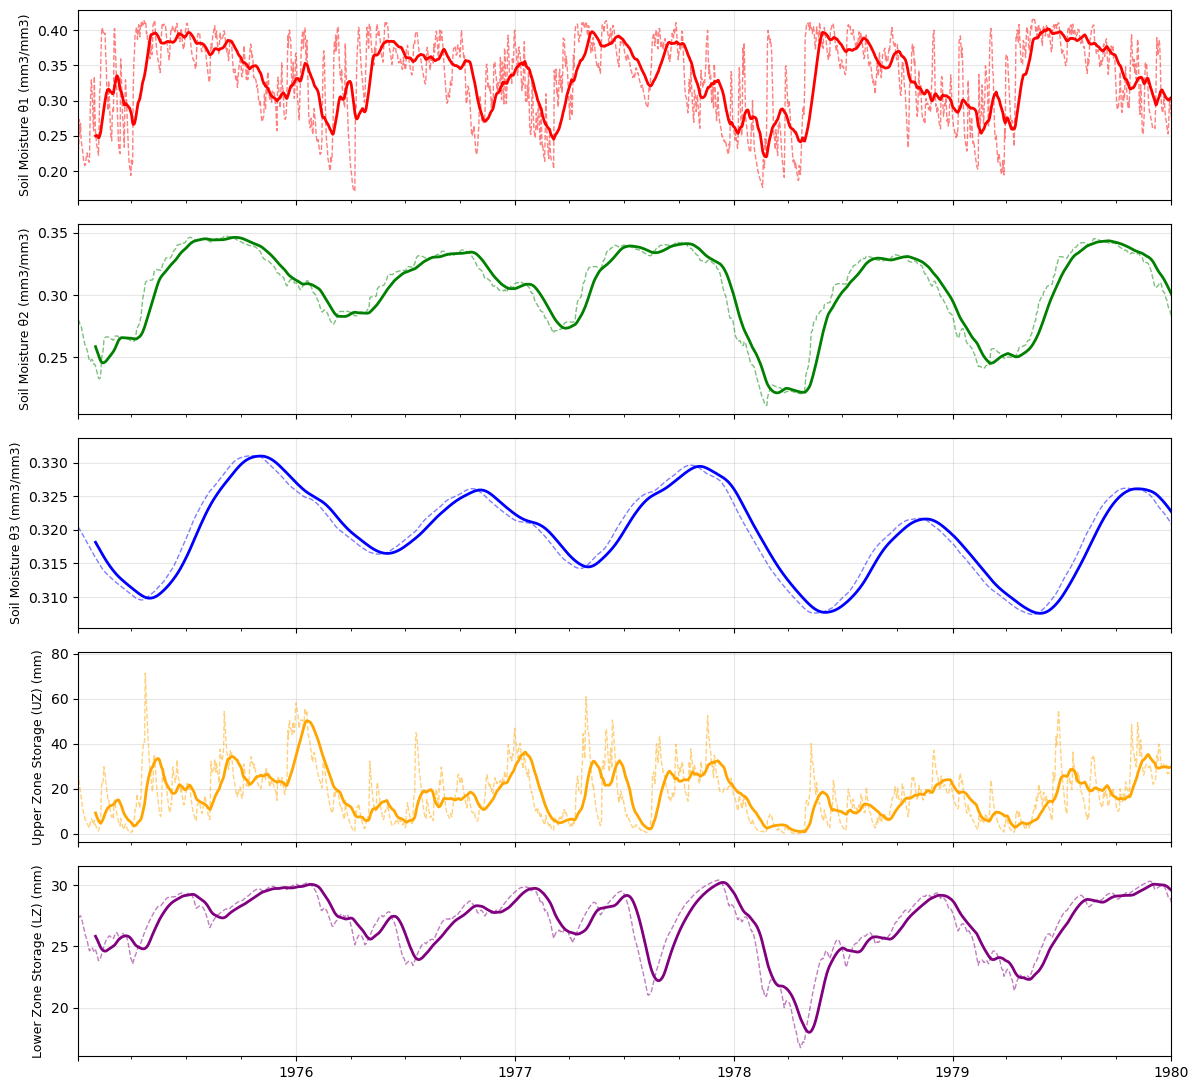

In [54]:
# Number of days to zoom in (5 years)
xul = 365*5 # use the numebr of years/time steps that shopuld be printed

# Variables to plot and their labels
vars_to_plot = ["theta", "theta2", "theta3","uz", "lz"]
labels = [
          "Soil Moisture θ1 (mm3/mm3)", 
          "Soil Moisture θ2 (mm3/mm3)", 
          "Soil Moisture θ3 (mm3/mm3)",
          "Upper Zone Storage (UZ) (mm)", 
          "Lower Zone Storage (LZ) (mm)"]

colors = ["r", "g", "b", "orange", "purple"]

# Create subplots
fig, axes = plt.subplots(len(vars_to_plot), 1, figsize=(12, 11), sharex=True)

for i, var in enumerate(vars_to_plot):
    # Plot raw data with faint alpha
    lf_tss[var].plot(ax=axes[i], color=colors[i], lw=1, alpha=0.5, ls="--", label="_nolegend_")
    
    # Optionally, plot a rolling mean (e.g., 30-day moving average) for smoothing
    lf_tss[var].rolling(30).mean().plot(ax=axes[i], color=colors[i], lw=2, label=f"{labels[i]} 30-day MA")
    
    axes[i].set_ylabel(labels[i],fontsize=9)
    axes[i].grid(True, alpha=0.3)
    # Zoom to first 5 years if desired
    axes[i].set_xlim(lf_tss[var].index[0], lf_tss[var].index[xul])
    axes[i].legend().remove() 

# Shared x-label for all subplots
axes[-1].set_xlabel("")

# Adjust layout
fig.tight_layout()



---
### **Actual Evapotranspiration**
Now let us check how Actual Evapotranspiration (ETA) looks in the catchment.<br>
For this we will have a look at the annual ETA sums to explore what happened during the simulation period. <br>

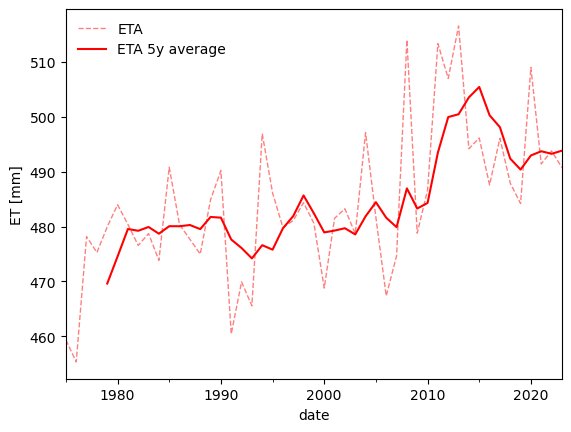

In [55]:
eta = lf_tss["eta"]
# Annual ETA
ws = 5 # moving average size in years
fig, ax = plt.subplots()
eta.resample("YS").sum().plot(ax=ax,label="ETA",c="r",lw=1,alpha=0.5,ls="--")
eta.resample("YS").sum().rolling(window=ws).mean().plot(ax=ax,label="ETA",c="r",lw=1.5)
ax.set_ylabel("ET [mm]")
plt.legend(["ETA", "ETA 5y average"],frameon=False);


According to our longterm LISFLOOD simulation there seems to be a rise in ETA after 2010, which we will further explore. <br>
We will check whether energy-based changes, reflected as ETP, or an increase in atmospheric water availability, reflected as precipitation, or a combination and less distinct cause is responsible for the signal. <br> 
Let us thus have a look at the corresponding annual anomalies with respect to a defined reference period that we set to 1980 to 2009.

Remember that precipitation had a significantly higher mgnitude than ETP, which is why we will use standardized anomalies.<br>
Besides, as we have seen already that the catchment is energy-limnited, the hydrologists will already have a clear tendency on the driver. 

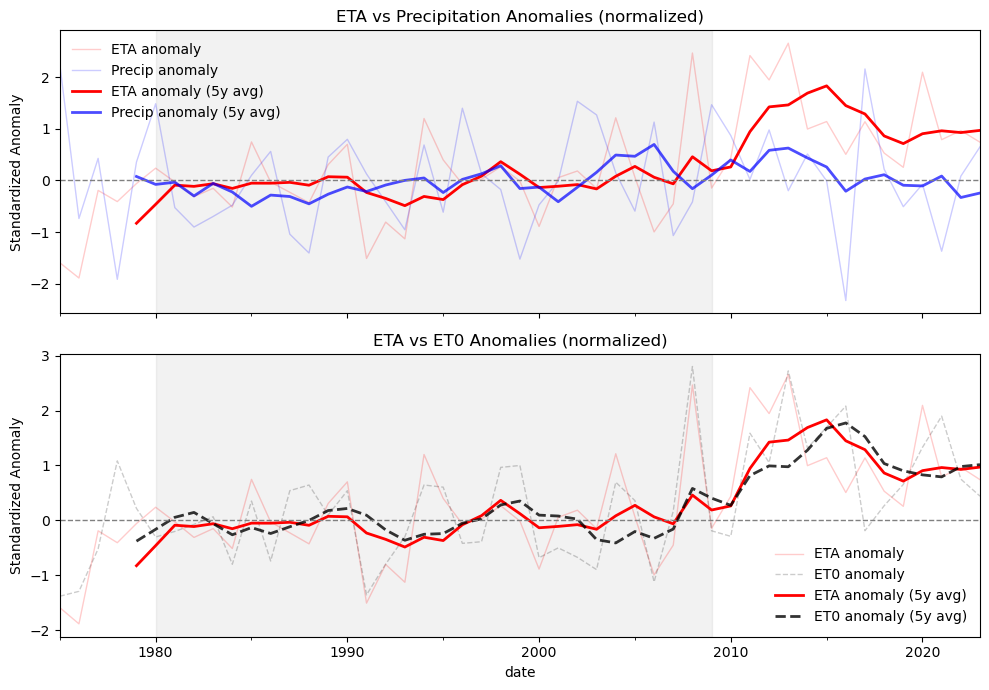

In [56]:
# --- Settings ---
ref_start, ref_end = "1980", "2009"
ws = 5  # moving average window in years

# --- Annual sums ---
eta_ann = lf_tss["eta"].resample("YS").sum()
precip_ann = lf_tss["precip"].resample("YS").sum()
et0_ann = lf_tss["et0"].resample("YS").sum()

# --- Compute reference means ---
eta_ref = eta_ann.loc[ref_start:ref_end].mean()
precip_ref = precip_ann.loc[ref_start:ref_end].mean()
et0_ref = et0_ann.loc[ref_start:ref_end].mean()

# --- Compute anomalies ---
eta_anom = eta_ann - eta_ref
precip_anom = precip_ann - precip_ref
et0_anom = et0_ann - et0_ref

# --- Normalize anomalies ---
eta_anom_std = eta_anom / eta_anom.std()
precip_anom_std = precip_anom / precip_anom.std()
et0_anom_std = et0_anom / et0_anom.std()

# --- Smooth anomalies with moving average ---
eta_smooth = eta_anom_std.rolling(ws).mean()
precip_smooth = precip_anom_std.rolling(ws).mean()
et0_smooth = et0_anom_std.rolling(ws).mean()

# --- Plot ---
fig, axes = plt.subplots(2, 1, figsize=(10,7), sharex=True)

# Top subplot: ETA vs Precip
# Raw anomalies (faint)
eta_anom_std.plot(ax=axes[0], color="r", lw=1, alpha=0.2, label=None)
precip_anom_std.plot(ax=axes[0], color="b", lw=1, alpha=0.2, label=None)

# Smoothed anomalies
eta_smooth.plot(ax=axes[0], label="ETA anomaly (5y avg)", color="r", lw=2)
precip_smooth.plot(ax=axes[0], label="Precip anomaly (5y avg)", color="b", lw=2, alpha=0.7)

axes[0].axhline(0, color="grey", ls="--", lw=1)
axes[0].set_ylabel("Standardized Anomaly")
axes[0].set_title("ETA vs Precipitation Anomalies (normalized)")
axes[0].legend(["ETA anomaly","Precip anomaly","ETA anomaly (5y avg)","Precip anomaly (5y avg)"],frameon=False)

# Highlight reference period
axes[0].axvspan(ref_start, ref_end, color='grey', alpha=0.1)

# Bottom subplot: ETA vs ET0
# Raw anomalies (faint)
eta_anom_std.plot(ax=axes[1], color="r", lw=1, alpha=0.2, label=None)
et0_anom_std.plot(ax=axes[1], color="k", lw=1, alpha=0.2, ls="--", label=None)

# Smoothed anomalies
eta_smooth.plot(ax=axes[1], label="ETA anomaly (5y avg)", color="r", lw=2)
et0_smooth.plot(ax=axes[1], label="ET0 anomaly (5y avg)", color="k", lw=2, ls="--", alpha=0.8)

axes[1].axhline(0, color="grey", ls="--", lw=1)
axes[1].set_ylabel("Standardized Anomaly")
axes[1].set_title("ETA vs ET0 Anomalies (normalized)")
axes[1].legend(["ETA anomaly","ET0 anomaly","ETA anomaly (5y avg)","ET0 anomaly (5y avg)"],frameon=False)

# Highlight reference period
axes[1].axvspan(ref_start, ref_end, color='grey', alpha=0.1)

# Layout adjustments
fig.tight_layout()
plt.show()

In [57]:
# Check ET/P & Q/P (Runoff Coefficient) & WB Closure
# Annual means
q_mm = lf_tss["q"]*1000*3600*24/basin_area
q_mm_ann = q_mm.resample("YS").sum()

q_p   = q_mm_ann / lf_tss["precip"].resample("YS").sum()
eta_p = lf_tss["eta"].resample("YS").sum() / lf_tss["precip"].resample("YS").sum()
eta_et0 = lf_tss["eta"].resample("YS").sum() / lf_tss["et0"].resample("YS").sum()
wb_closure = q_p + eta_p
wb_closure_end = (q_mm.resample("YS").sum().cumsum().iloc[-1] + lf_tss["eta"].resample("YS").sum().cumsum().iloc[-1]) / lf_tss["precip"].resample("YS").sum().cumsum().iloc[-1]

print("Annual water balance ratios (mean ± std):")
print(f"  Runoff coefficient Q/P   = {q_p.mean().item():.2f} ± {q_p.std().item():.2f}")
print(f"  Evapotranspiration ETA/P = {eta_p.mean().item():.2f} ± {eta_p.std().item():.2f}")
print(f"  ET efficiency ETA/ET0    = {eta_et0.mean().item():.2f} ± {eta_et0.std().item():.2f}")

# Check WB closure
print(f"Mean water balance closure (Q/P + ETA/P) = {wb_closure.mean().item():.2f}")
print(f"Water balance closure at the end of the simulation = {wb_closure_end.item():.2f}")


Annual water balance ratios (mean ± std):
  Runoff coefficient Q/P   = 0.73 ± 0.04
  Evapotranspiration ETA/P = 0.25 ± 0.03
  ET efficiency ETA/ET0    = 0.70 ± 0.02
Mean water balance closure (Q/P + ETA/P) = 0.98
Water balance closure at the end of the simulation = 0.98


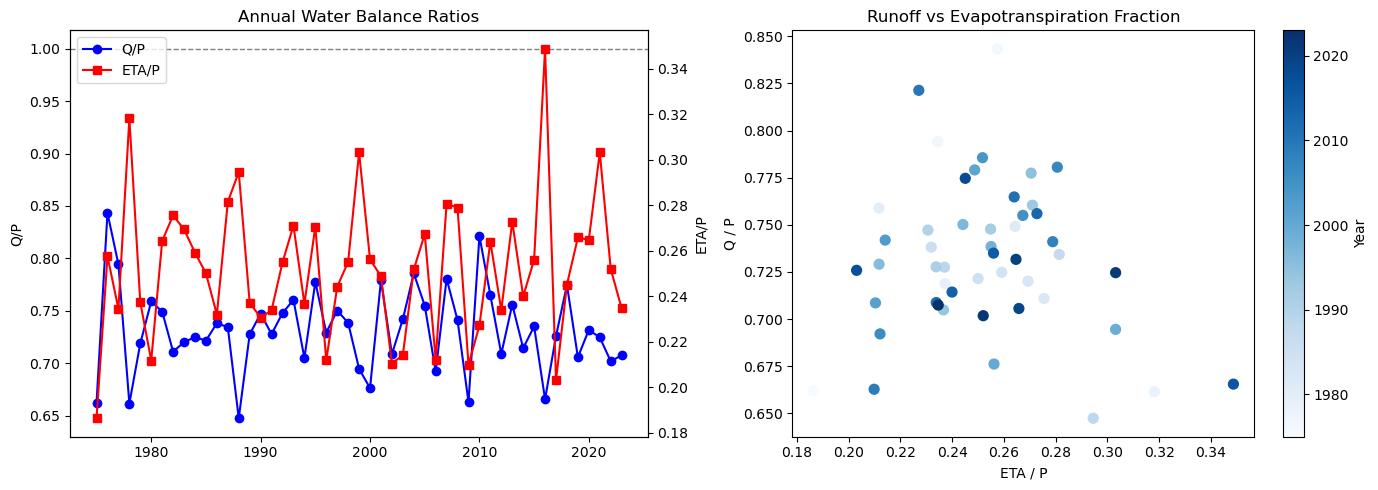

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# ----------------------------
# Left: Annual water balance ratios over time
# ----------------------------

# Primary axis: Q/P
axes[0].plot(q_p.index, q_p.values, color="b", marker="o", label="Q/P", lw=1.5)
axes[0].set_ylabel("Q/P")
axes[0].set_title("Annual Water Balance Ratios")
axes[0].axhline(1, color="grey", ls="--", lw=1)

# Secondary axis: ETA/P (optional, use if scales differ)
ax2 = axes[0].twinx()
ax2.plot(eta_p.index, eta_p.values, color="r", marker="s", label="ETA/P", lw=1.5)
ax2.set_ylabel("ETA/P")

# Combine legends
lines1, labels1 = axes[0].get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
axes[0].legend(lines1 + lines2, labels1 + labels2, loc="upper left")

# ----------------------------
# Right: Scatter Q/P vs ETA/P
# ----------------------------
sc = axes[1].scatter(eta_p, q_p, c=eta_p.index.year, cmap="Blues", s=50)
axes[1].set_xlabel("ETA / P")
axes[1].set_ylabel("Q / P")
axes[1].set_title("Runoff vs Evapotranspiration Fraction")

# Add colorbar for year
cbar = fig.colorbar(sc, ax=axes[1])
cbar.set_label("Year")

# ----------------------------
# Layout adjustments
# ----------------------------
fig.tight_layout()



---
### **Climate Elasticity**
Finally we will examine how streamflow (Q) responds to changes in climate variables (evapotranspiration and precipitation) using climate elasticity, a widely used measure of the percentage change in runoff for a given percentage change in climate input.

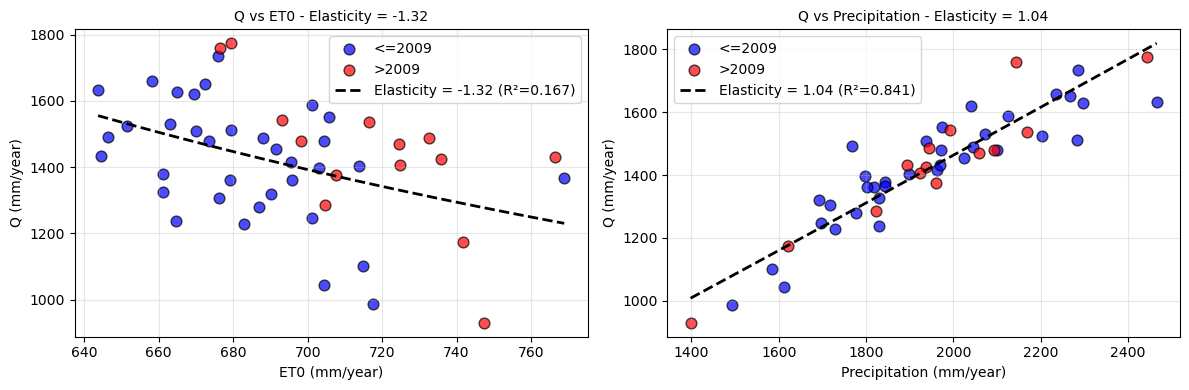

CLIMATE ELASTICITY ANALYSIS

Q vs ET0 (Evapotranspiration):
  Elasticity (slope): -1.3181
  R²: 0.1674
  Interpretation: A 1% increase in ET0 leads to -1.32% change in Q

Q vs Precipitation:
  Elasticity (slope): 1.0393
  R²: 0.8409
  Interpretation: A 1% increase in Precip leads to 1.04% change in Q


In [71]:
# --- Climate Elasticity Analysis (log-log regression) ---
ln_q = np.log(q_mm_ann.values.flatten())
ln_et0 = np.log(et0_ann.values.flatten())
ln_precip = np.log(precip_ann.values.flatten())

# Compute elasticity (slope in log-log space)
slope_et0, intercept_et0, r_et0 = linregress_np(ln_et0, ln_q)
slope_precip, intercept_precip, r_precip = linregress_np(ln_precip, ln_q)

years = q_mm_ann.index.year.values  # or whatever your time dimension is called
mask_before = years <= 2009
mask_after = years > 2009

# Create figure with two subplots for elasticity
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# --- Elasticity 1: Q vs ET0 ---
ax1 = axes[0]
ax1.scatter(et0_ann[mask_before], q_mm_ann[mask_before], c='blue', label='<=2009', alpha=0.7, s=60, edgecolors='black')
ax1.scatter(et0_ann[mask_after], q_mm_ann[mask_after], c='red', label='>2009', alpha=0.7, s=60, edgecolors='black')

# Log-log fit line
x_fit_et0 = np.linspace(ln_et0.min(), ln_et0.max(), 100)
y_fit_et0 = slope_et0 * x_fit_et0 + intercept_et0
ax1.plot(np.exp(x_fit_et0), np.exp(y_fit_et0), 'k--', lw=2, label=f'Elasticity = {slope_et0:.2f} (R²={r_et0**2:.3f})')

ax1.set_xlabel('ET0 (mm/year)', fontsize=10)
ax1.set_ylabel('Q (mm/year)', fontsize=10)
ax1.set_title(f'Q vs ET0 - Elasticity = {slope_et0:.2f}', fontsize=10)
ax1.legend()
ax1.grid(True, alpha=0.3)

# --- Elasticity 2: Q vs Precipitation ---
ax2 = axes[1]
ax2.scatter(precip_ann[mask_before], q_mm_ann[mask_before], c='blue', label='<=2009', alpha=0.7, s=60, edgecolors='black')
ax2.scatter(precip_ann[mask_after], q_mm_ann[mask_after], c='red', label='>2009', alpha=0.7, s=60, edgecolors='black')

# Log-log fit line
x_fit_precip = np.linspace(ln_precip.min(), ln_precip.max(), 100)
y_fit_precip = slope_precip * x_fit_precip + intercept_precip
ax2.plot(np.exp(x_fit_precip), np.exp(y_fit_precip), 'k--', lw=2, label=f'Elasticity = {slope_precip:.2f} (R²={r_precip**2:.3f})')

ax2.set_xlabel('Precipitation (mm/year)', fontsize=10)
ax2.set_ylabel('Q (mm/year)', fontsize=10)
ax2.set_title(f'Q vs Precipitation - Elasticity = {slope_precip:.2f}', fontsize=10)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# --- Print Elasticity Summary ---
print("=" * 60)
print("CLIMATE ELASTICITY ANALYSIS")
print("=" * 60)
print(f"\nQ vs ET0 (Evapotranspiration):")
print(f"  Elasticity (slope): {slope_et0:.4f}")
print(f"  R²: {r_et0**2:.4f}")
print(f"  Interpretation: A 1% increase in ET0 leads to {slope_et0:.2f}% change in Q")

print(f"\nQ vs Precipitation:")
print(f"  Elasticity (slope): {slope_precip:.4f}")
print(f"  R²: {r_precip**2:.4f}")
print(f"  Interpretation: A 1% increase in Precip leads to {slope_precip:.2f}% change in Q")
print("=" * 60)



---
## 3b) Maps (.nc)
Last but not least we will have a quick look how some water balance components look spatially. <br>
However, we will also remove the last day of the simulation period as it is the only day we have in 2024 and we would like to check annual means of the variables. <br>
And besides that, we will have a detailed look at the time steps of the soil moisture (theta) of layer 1. <br>
Why do we do that?<br>
Remember that we set the printing time step of the state variable maps to every 365 days, which we will prove.


In [77]:
# Read Maps
vars_to_read = ["etact", "dis", "th1", "scov", "smelt"]

et_map, q_map, theta_map, swe_map, smlt_map = [
    xr.open_dataset(outfold / f"{var}.nc")
    for var in vars_to_read
]

# Remove last time step for cleaner full zear approach
smlt_map = smlt_map.isel(time=slice(None, -1))
et_map = et_map.isel(time=slice(None, -1))
q_map = q_map.isel(time=slice(None, -1))
swe_map = swe_map.isel(time=slice(None, -1))

# Check Time Steps of theta and another variable
print("Number of time steps theta:", theta_map.sizes["time"])
print("Number of time steps q:", q_map.sizes["time"])


Number of time steps theta: 49
Number of time steps q: 17896


We can see that the flag we created worked properly and that we only have an end of the year value for theta1, while we have daily values for all other variables.<br>
Let us plot the annual averages of them to dig into the spatial differences! 

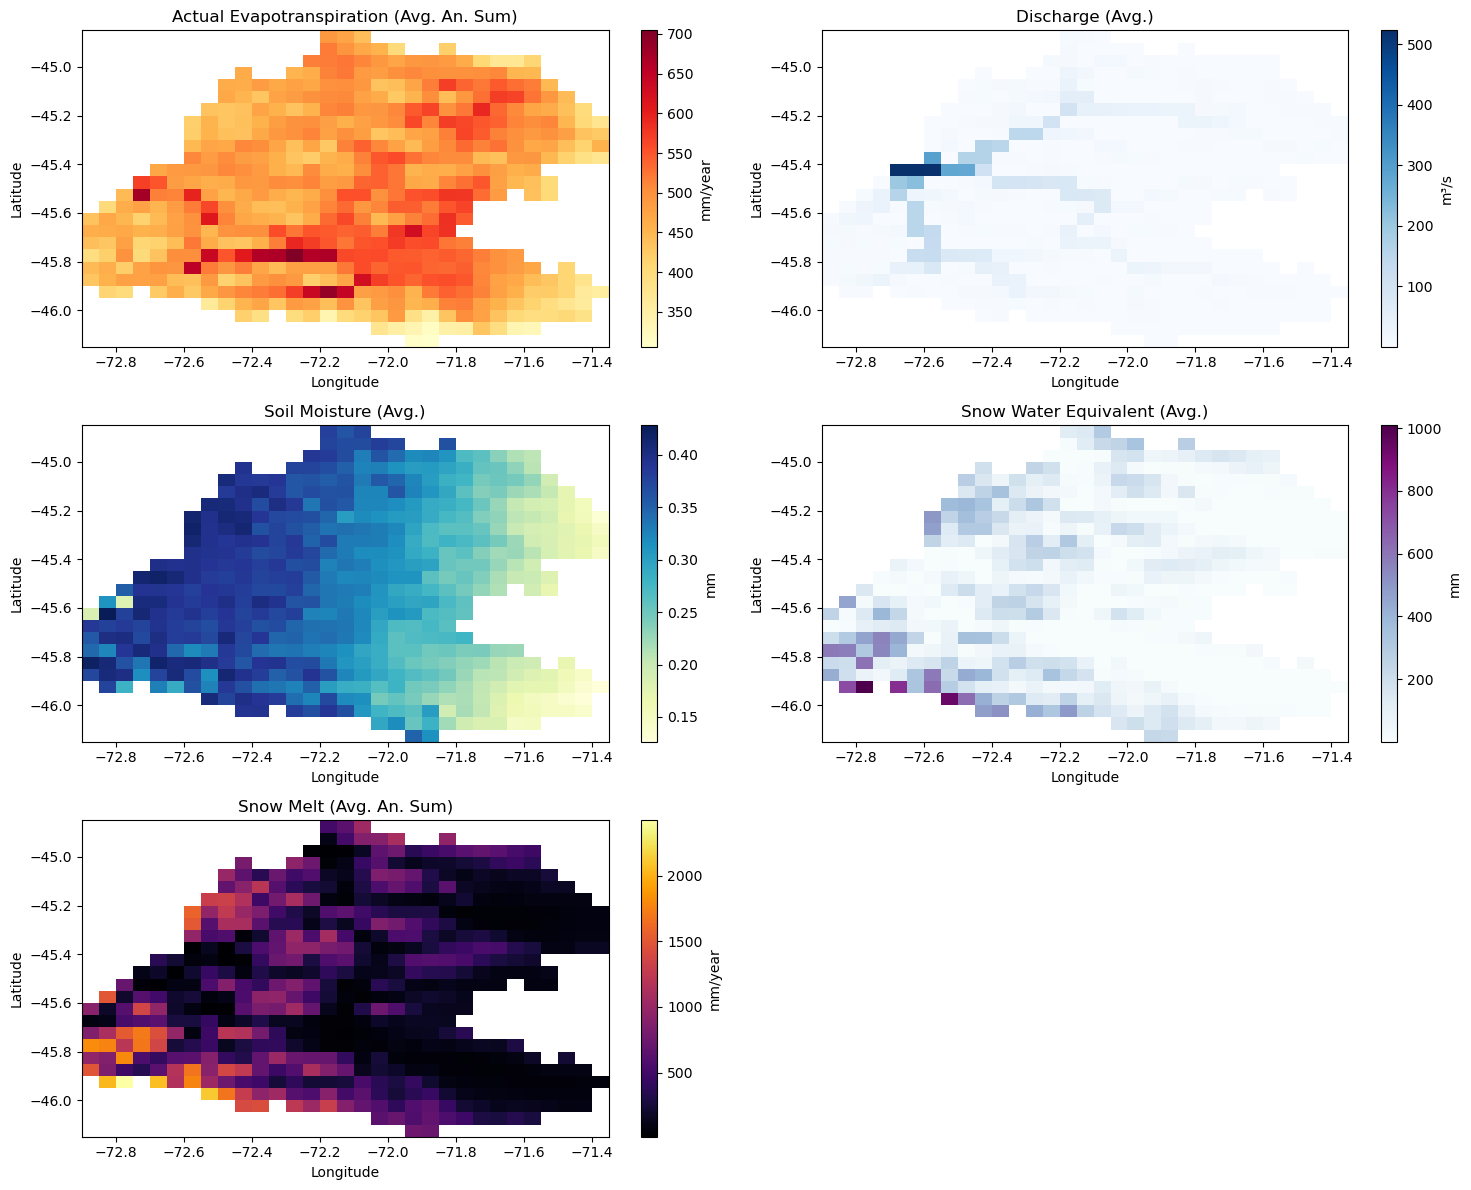

In [92]:
# Calculate annual averages
et_annual = et_map.etact.resample(time="1Y").sum(skipna=False).mean(dim="time")
q_annual = q_map.dis.mean('time')
theta_annual = theta_map.th1.mean('time')
swe_annual = swe_map.scov.mean("time")
smlt_annual = smlt_map.smelt.resample(time='1Y').sum(skipna=False).mean(dim="time")

# Actual Pllot
cmaps = [
    "YlOrRd",   # ET
    "Blues",    # Discharge
    "YlGnBu",   # Soil Moisture
    "BuPu",     # Snow Cover
    "inferno",  # Snow Melt
]

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

datasets = [
    (et_annual,   "Actual Evapotranspiration (Avg. An. Sum)", "mm/year"),
    (q_annual,    "Discharge (Avg.)", "m³/s"),
    (theta_annual,"Soil Moisture (Avg.)", "mm"),
    (swe_annual,  "Snow Water Equivalent (Avg.)", "mm"),
    (smlt_annual, "Snow Melt (Avg. An. Sum)", "mm/year"),
]

for idx, ((data, title, cbar_label), cmap) in enumerate(zip(datasets, cmaps)):
    ax = axes[idx]
    data.plot.pcolormesh(
        ax=ax,
        cmap=cmap,
        add_colorbar=True,
        cbar_kwargs={"label": cbar_label}
    )
    ax.set_title(f"{title}")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

# Hide the unused 6th subplot
axes[-1].set_visible(False)

plt.tight_layout()
